In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

db = pd.read_csv("C:/Users/Swathi/Desktop/Excelr Classes/Assignments/4.Multi linear Regression/50_Startups.csv")
db.head()

startup= db.drop(["State"],axis=1)
startup=startup.rename(columns = {'R&D_Spend':'RD',  'Administration':'ADM',  'Marketing_Spend':'MS'})
startup.head()

,RD,ADM,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
#Correlation matrix to identify auto correlation
print(startup.corr())

              RD       ADM        MS    Profit
RD      1.000000  0.241955  0.724248  0.972900
ADM     0.241955  1.000000 -0.032154  0.200717
MS      0.724248 -0.032154  1.000000  0.747766
Profit  0.972900  0.200717  0.747766  1.000000


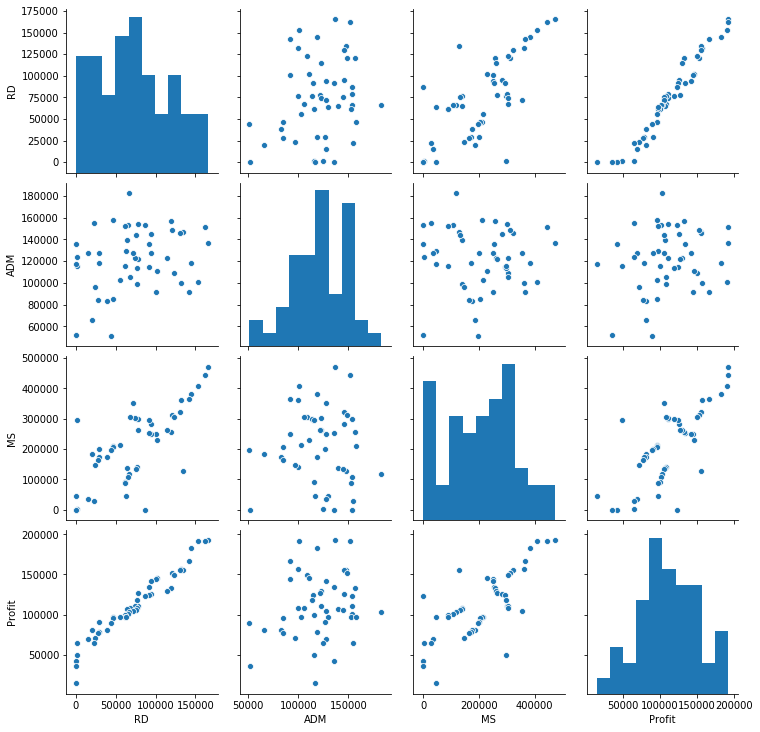

In [4]:
# Visually identifing Auto Correlation
sns.pairplot(startup)
plt.show()

In [5]:
# MODEL 1: regression model - without treating autocorrelation

import statsmodels.formula.api as smf
Model1 = smf.ols('Profit~RD+ADM+MS',data=startup).fit() 
print(Model1.summary())
Model1_pred = Model1.predict(startup)
Model1_error = Model1_pred - startup.Profit
RMSE_Model1=np.sqrt(np.mean(Model1_error*Model1_error))
print("RMSE Value of Model 1 is: ",RMSE_Model1)
print("Rsquared Value          : ",Model1.rsquared)


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 03 May 2020   Prob (F-statistic):           4.53e-30
Time:                        20:09:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.0

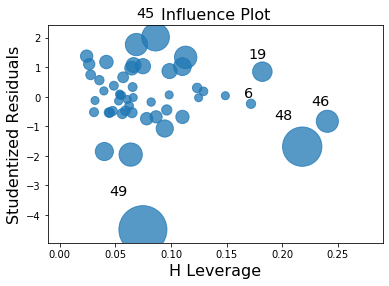

In [6]:
#Create influencial plot
import statsmodels.api as sm
sm.graphics.influence_plot(Model1)
plt.show()



In [7]:
#check row values of outstanding points from influence plot
# print(df.iloc[[19,45,46,47,48,49]]) 

startup_new=startup.drop(startup.index[[19,45,46,47,48,49]],axis=0)


In [8]:
# MODEL 2: Model after droping rows identified using influenctial plot

Model1_new=smf.ols('Profit~RD+ADM+MS',data=startup_new).fit() 
print(Model1_new.summary())
Model1_new_pred = Model1_new.predict(startup_new)
Model1_new_error = Model1_new_pred - startup_new.Profit
RMSE_Model1_new = np.sqrt(np.mean(Model1_new_error*Model1_new_error))
print("RMSE Value of Model1_New is: ", RMSE_Model1_new)
print("Rsquared Value             : ",Model1_new.rsquared)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     325.2
Date:                Sun, 03 May 2020   Prob (F-statistic):           4.08e-28
Time:                        20:10:24   Log-Likelihood:                -450.26
No. Observations:                  44   AIC:                             908.5
Df Residuals:                      40   BIC:                             915.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.664e+04   5812.510      9.744      0.0

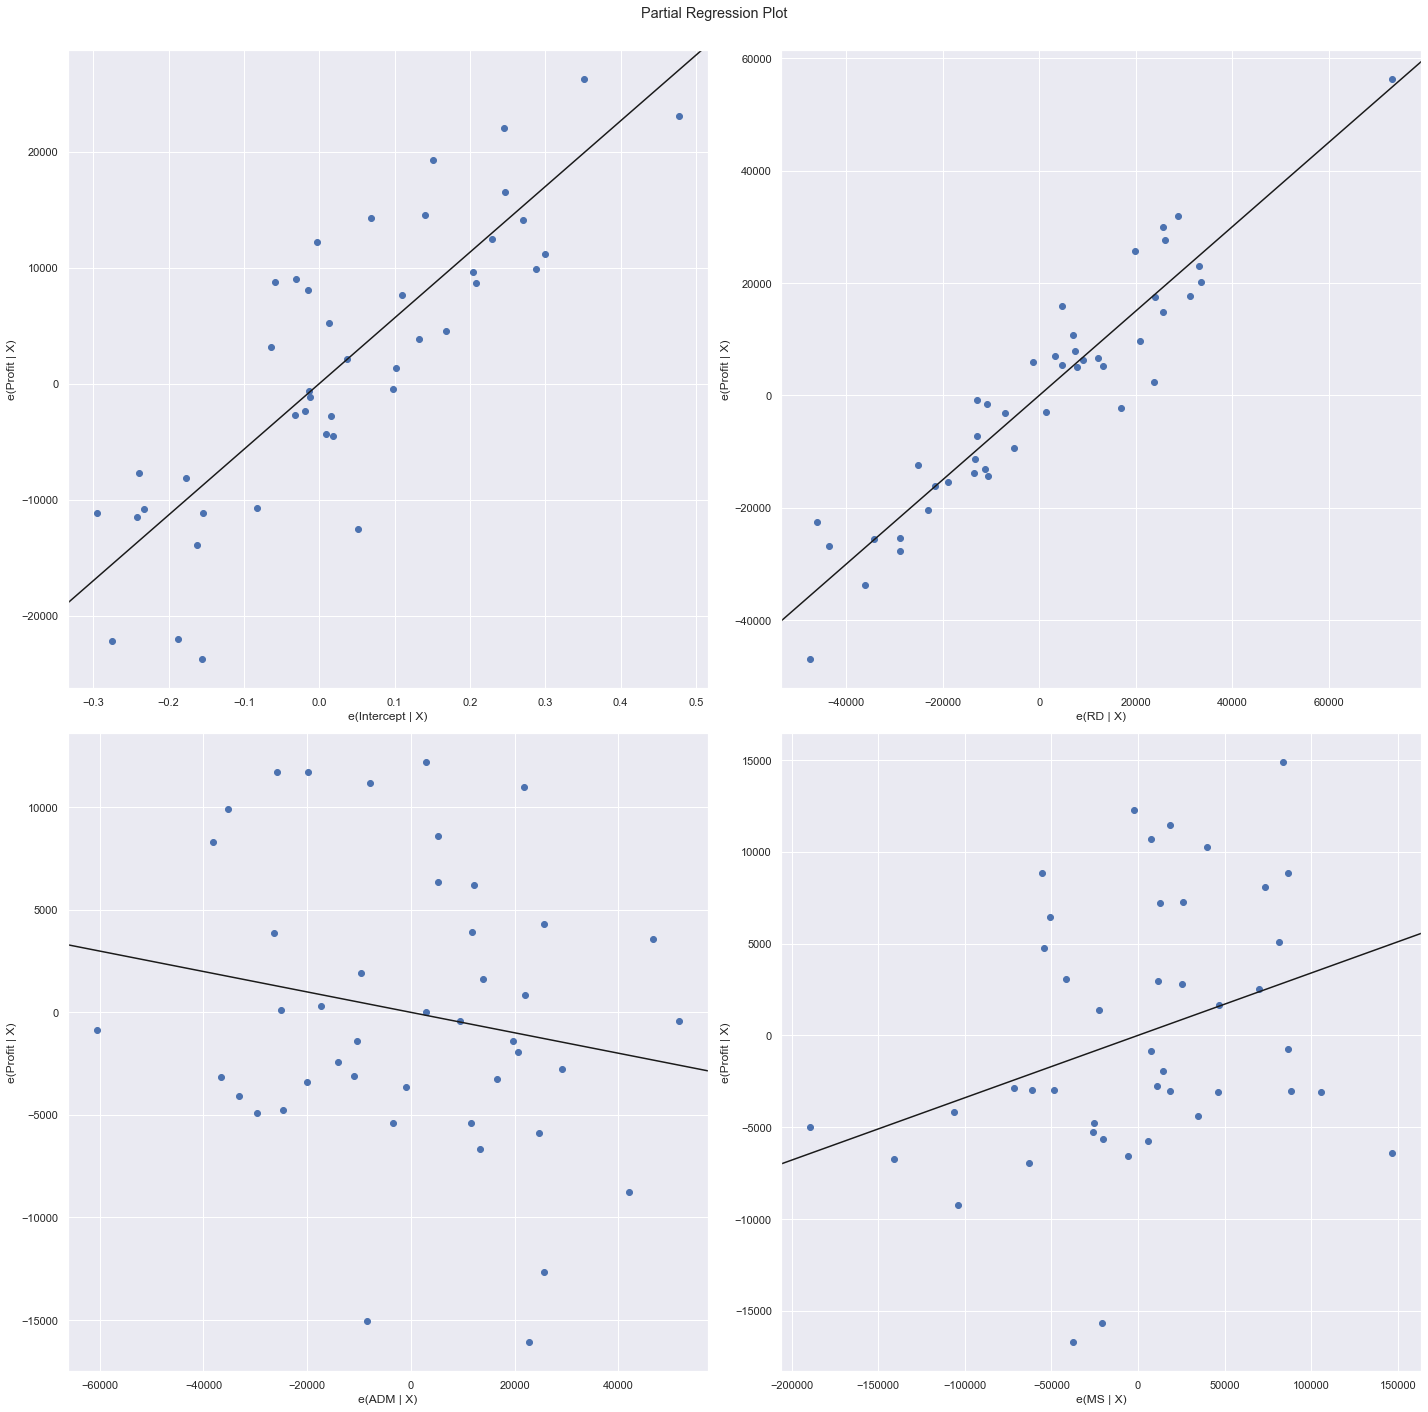

In [16]:
# Plot partial regression plot for identifying impact of each features 
sm.graphics.plot_partregress_grid(Model1_new)
sns.set(rc={'figure.figsize':(15,10)})
plt.show()

In [9]:
# MODEL 3: droping 'Administration' Column


# By observing 'p'values from Model1_new and also from Partial regression plot, we can drop 'Administration'


Final_Model = smf.ols('Profit~RD+MS',data=startup_new).fit() 
print(Final_Model.summary())

Final_Model_pred = Final_Model.predict(startup_new)
Final_Model_error = Final_Model_pred - startup_new.Profit
RMSE_Final_Model=np.sqrt(np.mean(Final_Model_error*Final_Model_error))
print("RMSE Value of Final Model is: ", RMSE_Final_Model)
print("Rsquared Value              : ",Final_Model.rsquared)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     483.0
Date:                Sun, 03 May 2020   Prob (F-statistic):           3.16e-29
Time:                        20:11:06   Log-Likelihood:                -450.98
No. Observations:                  44   AIC:                             908.0
Df Residuals:                      41   BIC:                             913.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.063e+04   2630.040     19.249      0.0

In [10]:
data = {'Model 1' :Model1.rsquared, 'Model1_New':Model1_new.rsquared,'Final Model':Final_Model.rsquared}
R_square = pd.DataFrame(data,index =['Value']) 
R_square

,Model 1,Model1_New,Final Model
Value,0.950746,0.960609,0.959287


In [21]:
from sklearn import linear_model

reg=linear_model.LinearRegression()
reg.fit(startup_new[['RD','MS']],startup_new.Profit)

print("Coefficent M: ",reg.coef_)
print("intercept 'B': ",reg.intercept_)

flag=True
while(flag):
    a = int(input("R&D_Spend: "))
    b = int(input("Marketing_Spend: "))
    myoutput = reg.predict([[a,b]])
    print("Profit: ",myoutput)
    flag = int(input("press 1 to continue or Press 0 to exit : "))


Coefficent M:  [0.7308015  0.04060141]
intercept 'B':  50626.21146231462
R&D_Spend: 50000
Marketing_Spend: 200000
Profit:  [95286.56815633]
press 1 to continue or Press 0 to exit : 0
